# Hierarchical clustering

## Setup

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from katlas.core import *
from katlas.feature import *
from katlas.plot import *

from scipy.cluster.hierarchy import linkage, dendrogram, to_tree,fcluster

from Bio import Phylo
from io import StringIO

## Data

In [ ]:
df = Data.get_cddm().iloc[:,:-3]

In [ ]:
tyr = (df['0y']>0.7).index

In [ ]:
# Ward method to calculate linkage matrix
Z = linkage(df, method='ward')

In [ ]:
Z

array([[1.20000000e+01, 1.70000000e+01, 8.16324973e-02, 2.00000000e+00],
       [1.50000000e+01, 2.89000000e+02, 8.70342690e-02, 3.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 8.89836215e-02, 2.00000000e+00],
       ...,
       [5.69000000e+02, 5.73000000e+02, 4.49856709e+00, 1.67000000e+02],
       [5.65000000e+02, 5.74000000e+02, 4.58327062e+00, 2.09000000e+02],
       [5.66000000e+02, 5.75000000e+02, 1.20398599e+01, 2.89000000e+02]])

## Plot dendrogram

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

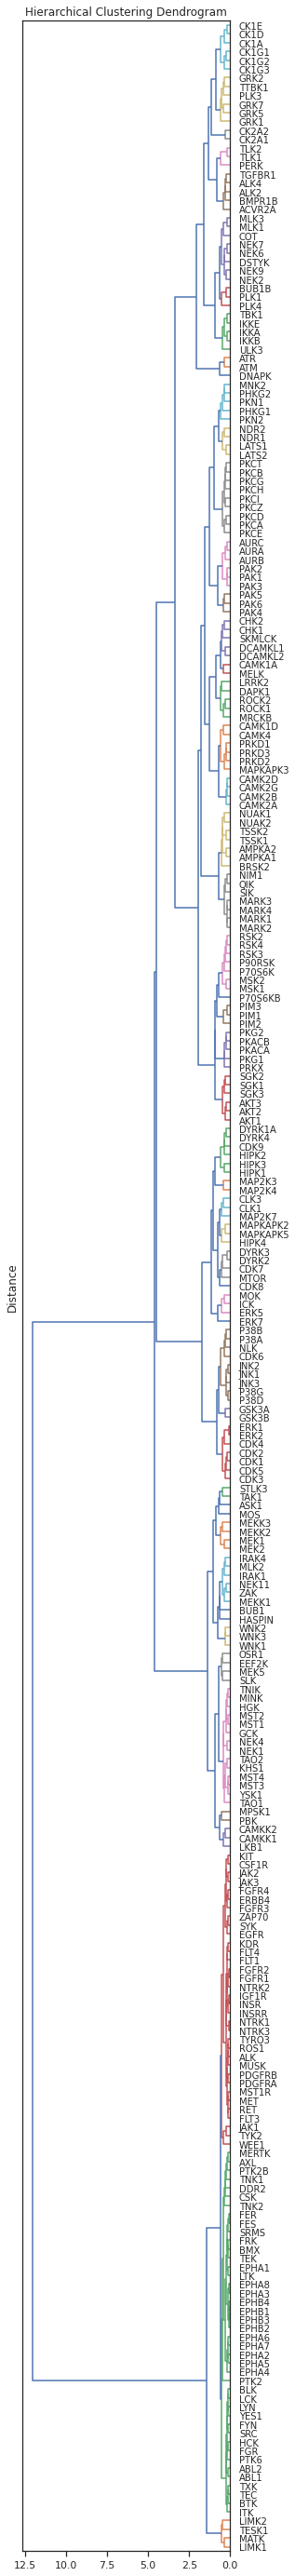

In [ ]:
plt.figure(figsize=(4,50))
dendrogram(Z,orientation='left',leaf_font_size=10,labels=df.index,color_threshold=0.6)
plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## Save Tree

In [ ]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.
    Referenced from: https://stackoverflow.com/questions/28222179/save-dendrogram-to-newick-format
    
    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

In [ ]:
tree = to_tree(Z, False)

In [ ]:
newick_str = get_newick(tree, tree.dist, df.index)

In [ ]:
newick_str

'((((((((((((CK1E:0.21,CK1D:0.21):0.14,CK1A:0.35):0.23,((CK1G1:0.24,CK1G2:0.24):0.10,CK1G3:0.34):0.25):0.27,((((GRK2:0.35,TTBK1:0.35):0.06,PLK3:0.41):0.11,(GRK7:0.39,GRK5:0.39):0.12):0.07,GRK1:0.58):0.28):0.32,(CK2A2:0.31,CK2A1:0.31):0.87):0.13,(((TLK2:0.20,TLK1:0.20):0.38,PERK:0.58):0.22,((((TGFBR1:0.23,ALK4:0.23):0.05,ALK2:0.29):0.02,BMPR1B:0.30):0.14,ACVR2A:0.44):0.35):0.51):0.32,(((((MLK3:0.20,MLK1:0.20):0.24,COT:0.45):0.09,(((NEK7:0.18,NEK6:0.18):0.20,DSTYK:0.38):0.01,(NEK9:0.24,NEK2:0.24):0.15):0.15):0.13,((BUB1B:0.27,PLK1:0.27):0.27,PLK4:0.54):0.13):0.29,(((TBK1:0.22,IKKE:0.22):0.16,(IKKA:0.22,IKKB:0.22):0.17):0.12,ULK3:0.50):0.45):0.67):0.46,((ATR:0.36,ATM:0.36):0.26,DNAPK:0.62):1.46):1.25,((((((((((MNK2:0.33,PHKG2:0.33):0.05,PKN1:0.39):0.08,PHKG1:0.47):0.11,PKN2:0.58):0.11,((NDR2:0.37,NDR1:0.37):0.09,(LATS1:0.26,LATS2:0.26):0.20):0.24):0.26,(((((PKCT:0.26,PKCB:0.26):0.02,PKCG:0.28):0.04,PKCH:0.32):0.05,(PKCI:0.30,PKCZ:0.30):0.07):0.10,((PKCD:0.25,PKCA:0.25):0.12,PKCE:0.37):0.1

In [ ]:
# Save the Newick string to a file
with open(f'supp/CDDM.newick', 'w') as f:
    f.write(newick_str)# Open the tree.newick in figtree

## Determine threshold to cut tree

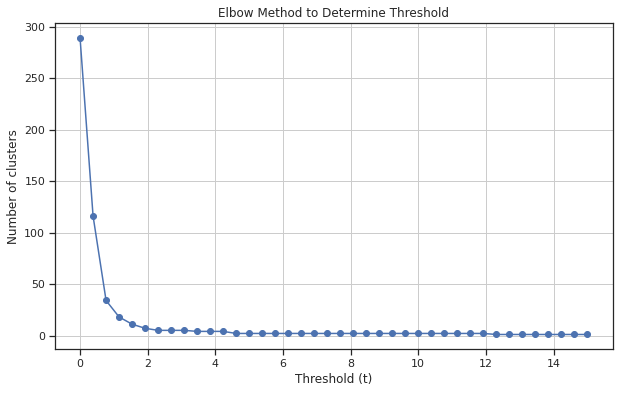

In [ ]:
# Generate a range of possible t values
t_values = np.linspace(0, 15, 40)  # Example range from 0.05 to 1
num_clusters = [len(np.unique(fcluster(Z, t=t, criterion='distance'))) for t in t_values]

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(t_values, num_clusters, marker='o')
plt.title('Elbow Method to Determine Threshold')
plt.xlabel('Threshold (t)')
plt.ylabel('Number of clusters')
plt.grid(True)
plt.show()

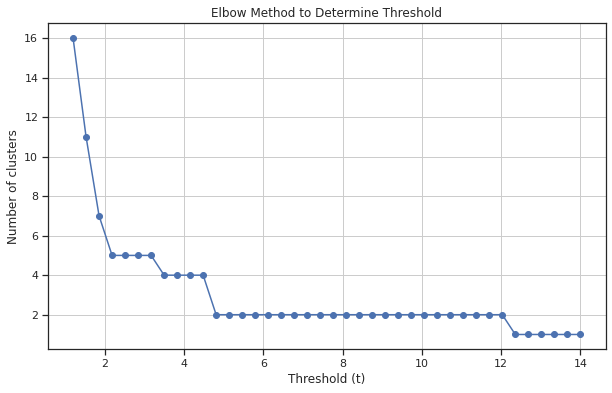

In [ ]:
# Generate a range of possible t values
t_values = np.linspace(1.2, 14, 40)  # Example range from 0.05 to 1
num_clusters = [len(np.unique(fcluster(Z, t=t, criterion='distance'))) for t in t_values]

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(t_values, num_clusters, marker='o')
plt.title('Elbow Method to Determine Threshold')
plt.xlabel('Threshold (t)')
plt.ylabel('Number of clusters')
plt.grid(True)
plt.show()

## UMAP

### Determine parameters in UMAP

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


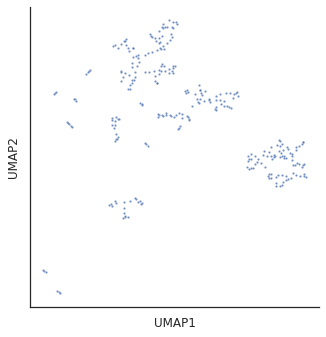

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


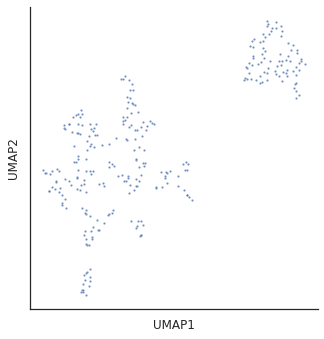

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


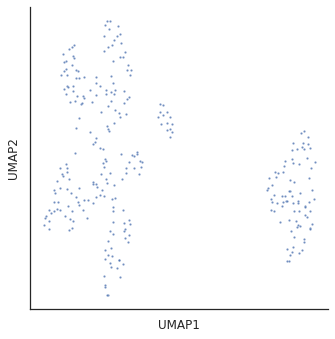

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


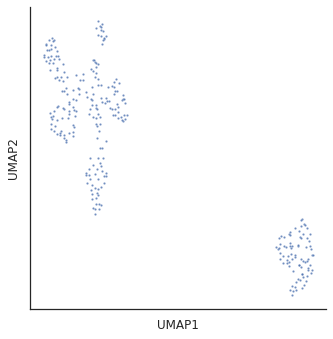

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


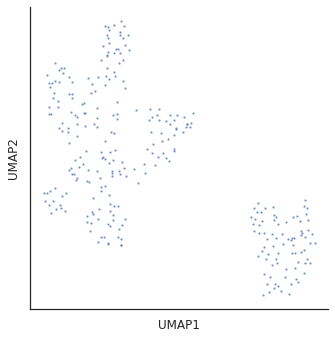

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


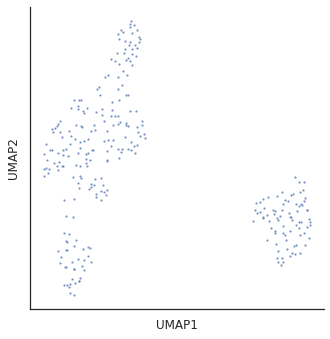

In [ ]:
# the lower the value, the more localized
for i in [3,5,10,15,20,30]:
    plot_cluster(df,method='umap',complexity=i,min_dist=0.6,s=5)
    plt.show()
    plt.close()

Complexity 5 looks good

### Visualize threshold for clusters

q is 3


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


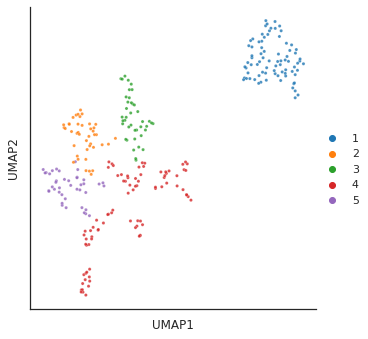

q is 4


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


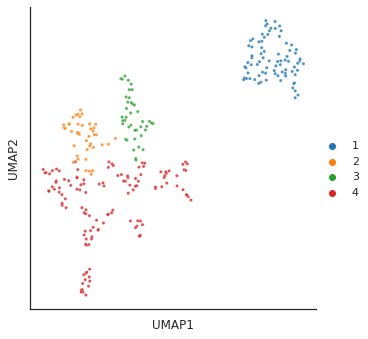

q is 6


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


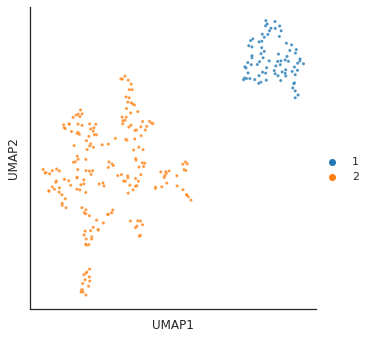

q is 14


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


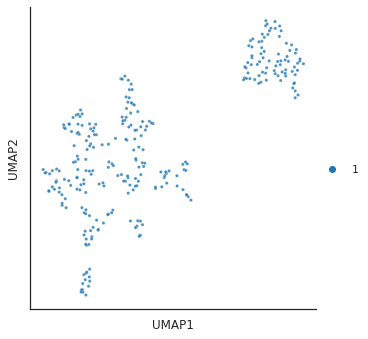

In [ ]:
# umap_matrix = reduce_feature(df,'umap',5,min_dist=0.6)

for i in [3,4,6,14]:
    
    # cut tree to get cluster
    cluster = fcluster(Z, t=i, criterion='distance')
    
    print(f'q is {i}') # lower value of q, more clusters
    # plot_2d(umap_matrix,legend=True, s=10, hue=cluster,palette='tab10')
    
    plot_cluster(df, hue = cluster,method= 'umap',palette='tab10',
                 s = 10,legend=True,complexity = 5,min_dist=0.6)
    plt.show()
    plt.close()

In [ ]:
cluster = fcluster(Z, t=3, criterion='distance')

In [ ]:
cluster_info = pd.DataFrame(df.index)

In [ ]:
cluster_info['CDDM_big'] = cluster

In [ ]:
cluster = fcluster(Z, t=0.6, criterion='distance')

In [ ]:
cluster_info['CDDM_small'] = cluster

In [ ]:
cluster_info.to_csv('supp/CDDM_cluster.csv',index=False)

In [ ]:
info = Data.get_kinase_info()

In [ ]:
info

,kinase,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_ST_paper,in_Tyr_paper,in_cddm,pseudo,pspa_category_small,pspa_category_big,cddm_big,cddm_small,length,human_uniprot_sequence,kinasecom_domain,nucleus,cytosol,cytoskeleton,plasma membrane,mitochondrion,Golgi apparatus,endoplasmic reticulum,vesicle,centrosome,aggresome,main_location
0,AAK1,AAK1,Q2M2I8,AAK1,Other,NAK,None,NAK,1,0,0,0,NAK,NAK,NaN,NaN,339,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,VTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,ABL1,ABL1,P00519,ABL1,TK,Abl,None,Abl,0,1,1,0,ABL,ABL,1.0,2.0,1130,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKQGVRGAVSTLLQAPELPTKTRTSRRAAEHRDTTDVPEMPHSKGQGESDPLDHEPAVSPLLPRKERGPPEGGLNEDERLLPKDKK...,ITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAF,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,cytosol
2,ABL2,ABL2,P42684,ABL2,TK,Abl,None,Abl,0,1,1,0,ABL,ABL,1.0,2.0,1182,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGFNIFTQHDHFASCVEDGFEGDKTGGSSPEALHRPYGCDVEPQALNEAIRWSSKENLLGATESDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNQNGEWSEVRSKNGQGWVPSNYITPVNSLEKHSWYHGPVSRSAAEYLLSSLINGSFLVRESESSPGQLSISLRYEGRVYHYRINTTADGKVYVTAESRFSTLAELVHHHSTVADGLVTTLHYPAPKCNKPTVYGVSPIHDKWEMERTDITMKHKLGGGQYGEVYVGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTLEPPFYIVTEYMPYGNLLDYLRECNREEVTAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHVVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNTFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYDLLEKGYRMEQPEGCPPKVYELMRACWKWSPADRPSFAETHQAFETMFHDSSISEEVAEELGRAASSSSVVPYLPRLPILPSKTRTLKKQVENKENIEGAQ...,ITMKHKLGGGQYGEVYVGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTLEPPFYIVTEYMPYGNLLDYLRECNREEVTAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHVVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNTFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYDLLEKGYRMEQPEGCPPKVYELMRACWKWSPADRPSFAETHQAF,NaN,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cytoskeleton
3,TNK2,ACK,Q07912,TNK2,TK,Ack,None,Ack,0,1,1,0,ACK,ACK,1.0,2.0,1038,MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDLEKIGMGRPGQRRLWEAVKRRKALCKRKSWMSKVFSGKRLEAEFPPHHSQSTFRKTSPAPGGPAGEGPLQSLTCLIGEKDLRLLEKLGDGSFGVVRRGEWDAPSGKTVSVAVKCLKPDVLSQPEAMDDFIREVNAMHSLDHRNLIRLYGVVLTPPMKMVTELAPLGSLLDRLRKHQGHFLLGTLSRYAVQVAEGMGYLESKRFIHRDLAARNLLLATRDLVKIGDFGLMRALPQNDDHYVMQEHRKVPFAWCAPESLKTRTFSHASDTWMFGVTLWEMFTYGQEPWIGLNGSQILHKIDKEGERLPRPEDCPQDIYNVMVQCWAHKPEDRPTFVALRDFLLEAQPTDMRALQDFEEPDKLHIQMNDVITVIEGRAENYWWRGQNTRTLCVGPFPRNVVTSVAGLSAQDISQPLQNSFIHTGHGDSDPRHCWGFPDRIDELYLGNPMDPPDLLSVELSTSRPPQHLGGVKKPTYDPVSEDQDPLSSDFKRLGLRKPGLPRGLWLAKPSARVPGTKASRGSGAEVTLIDFGEEPVVPALRPCAPSLAQLAMDA...,LRLLEKLGDGSFGVVRRGEWDAPSGKTVSVAVKCLKPDVLSQPEAMDD

## Plot UMAP

In [ ]:
info = Data.get_kinase_info().query('pseudo=="0"')

We have already merge the cluster in the info, so no need to merge here

In [ ]:
info = info.set_index('kinase')

### colored by CDDM cluster

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


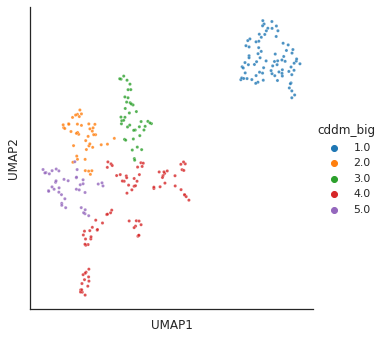

In [ ]:
plot_cluster(df, hue = info.cddm_big,method= 'umap',palette='tab10',
             s = 10,legend=True,complexity = 5,min_dist=0.6)

### colored by kinase family/group

In [ ]:
from fastcore.xtras import *

In [ ]:
color_group = load_pickle('raw/kinase_color.pkl')

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


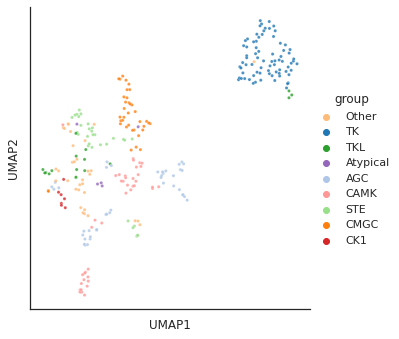

In [ ]:
plot_cluster(df, hue = info.group,method= 'umap',palette=color_group,
             s = 10,legend=True,complexity = 5,min_dist=0.6)

### PSPA category

In [ ]:
pspa_color = pd.read_csv('raw/pspa_color.csv')

In [ ]:
pspa_color = pspa_color.set_index('Label')['Color'].to_dict()

In [ ]:
info.pspa_category_big.value_counts()

basophilic                            87
pro-directed                          45
acidophilic                           32
MAP3K                                 17
MAP4K                                 17
ALPHA/MLK                             15
FGF and VEGF receptors                13
RIPK/WNK                              13
PKC                                   12
Ephrin receptors                      11
assorted                              11
NEK/ASK                               10
EIF2AK/TLK                            10
PDGF receptors                         9
SRC                                    8
TEC                                    7
CMGC                                   7
TAM receptors                          7
ULK/TTBK                               7
Insulin and neurotrophin receptors     6
Non-canonical (WEE)                    6
JAK                                    5
EGF receptors                          5
LKB/CAMKK                              5
IKK             

In [ ]:
info.columns

Index(['ID_coral', 'uniprot', 'ID_HGNC', 'group', 'family', 'subfamily_coral',
       'subfamily', 'in_ST_paper', 'in_Tyr_paper', 'in_cddm', 'pseudo',
       'pspa_category_small', 'pspa_category_big', 'cddm_big', 'cddm_small',
       'length', 'human_uniprot_sequence', 'kinasecom_domain', 'nucleus',
       'cytosol', 'cytoskeleton', 'plasma membrane', 'mitochondrion',
       'Golgi apparatus', 'endoplasmic reticulum', 'vesicle', 'centrosome',
       'aggresome', 'main_location'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


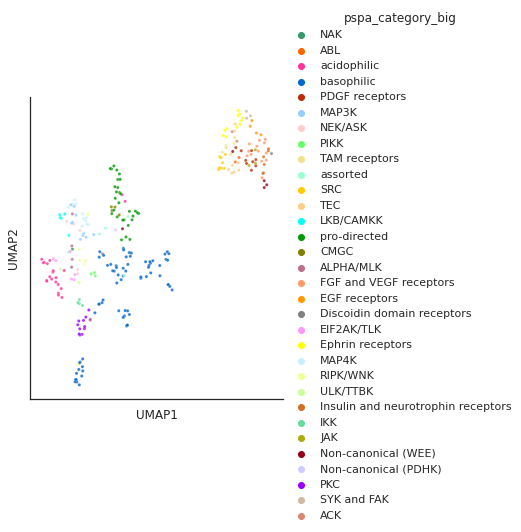

In [ ]:
plot_cluster(df, hue = info.pspa_category_big.str.split('_').str[0],
             method= 'umap',palette=pspa_color,
             s = 10,legend=True,complexity = 5,min_dist=0.6)

### Main location

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


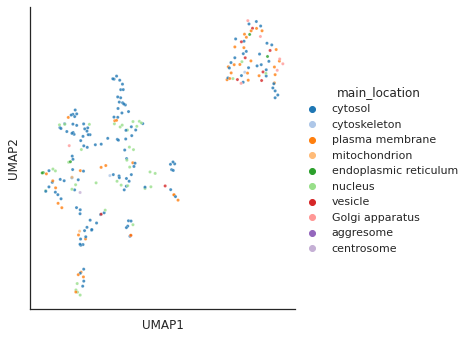

In [ ]:
plot_cluster(df, hue = info.main_location,method= 'umap',palette='tab20',
             s = 10,legend=True,complexity = 5,min_dist=0.6)